In [6]:
from getdist import loadMCSamples
from getdist import plots
import getdist
#import pylab as plt
import matplotlib
import numpy as np

#matplotlib.use('Agg')
matplotlib.rc('text')#,usetex=True)

In [7]:
#workdir = '/home/tirth/data/PhotonConserving/V5.0/script-private/examples/'
workdir = '/home/tirth/data/PhotonConserving/UVLF_Reionization_Code'
burn_in = 0.5

chainsdir = workdir + '/cobaya_chains/chains/'
#chainsdir = workdir + '/chains-2/'


fileroot = "reion_uvlf_9p"


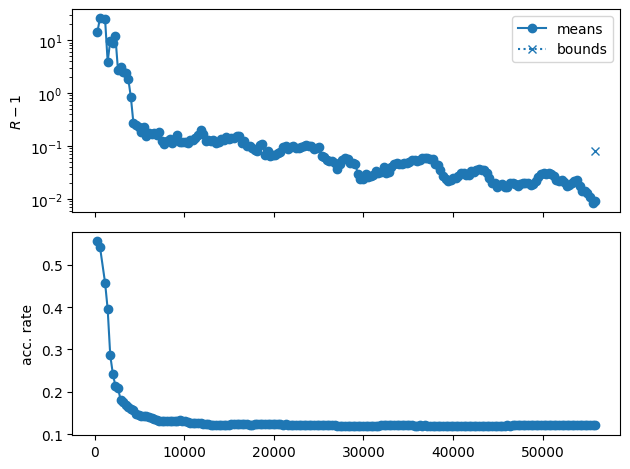

In [8]:
%matplotlib inline
from cobaya.samplers.mcmc import plot_progress
plot_progress(chainsdir + '/' + fileroot)
import matplotlib.pyplot as plt

plt.tight_layout()
plt.show()

Best fit sample -log(Like) = 38.589831
Ln(mean 1/like) = 50.496243
mean(-Ln(like)) = 44.490003
-Ln(mean like)  = 41.909521

parameter               bestfit        lower1         upper1         lower2         upper2
lsum                   -4.4566838E-01  1.8978759E+00 4.7252216E-310  1.9987830E+00  0.0000000E+00   \ell_{\varepsilon,0} + \dfrac{\ell_{\varepsilon,\mathrm{jump}}}{2}
ldiff                  -8.8891904E-01 -7.8205637E-01 4.7252217E-310 -7.6751357E-01  0.0000000E+00   \ell_{\varepsilon,0} - \dfrac{\ell_{\varepsilon,\mathrm{jump}}}{2}
l2                      1.0741092E+01  1.5303912E+01 1.1537702E-313  1.6208488E+01  0.0000000E+00   z_\ast
l3                      1.0385907E+00  3.3059439E+00 6.5399528E-310  4.5560642E+00 4.7258429E-310   \Delta z_\ast
asum                    8.2786762E-01  6.9363501E+00 6.5399528E-310  6.9997884E+00 4.7258430E-310   \alpha_0 + \dfrac{\alpha_\mathrm{jump}}{2}
adiff                   3.0014556E-01  4.5896472E-01 6.5399528E-310  4.6664660E-01 4.72

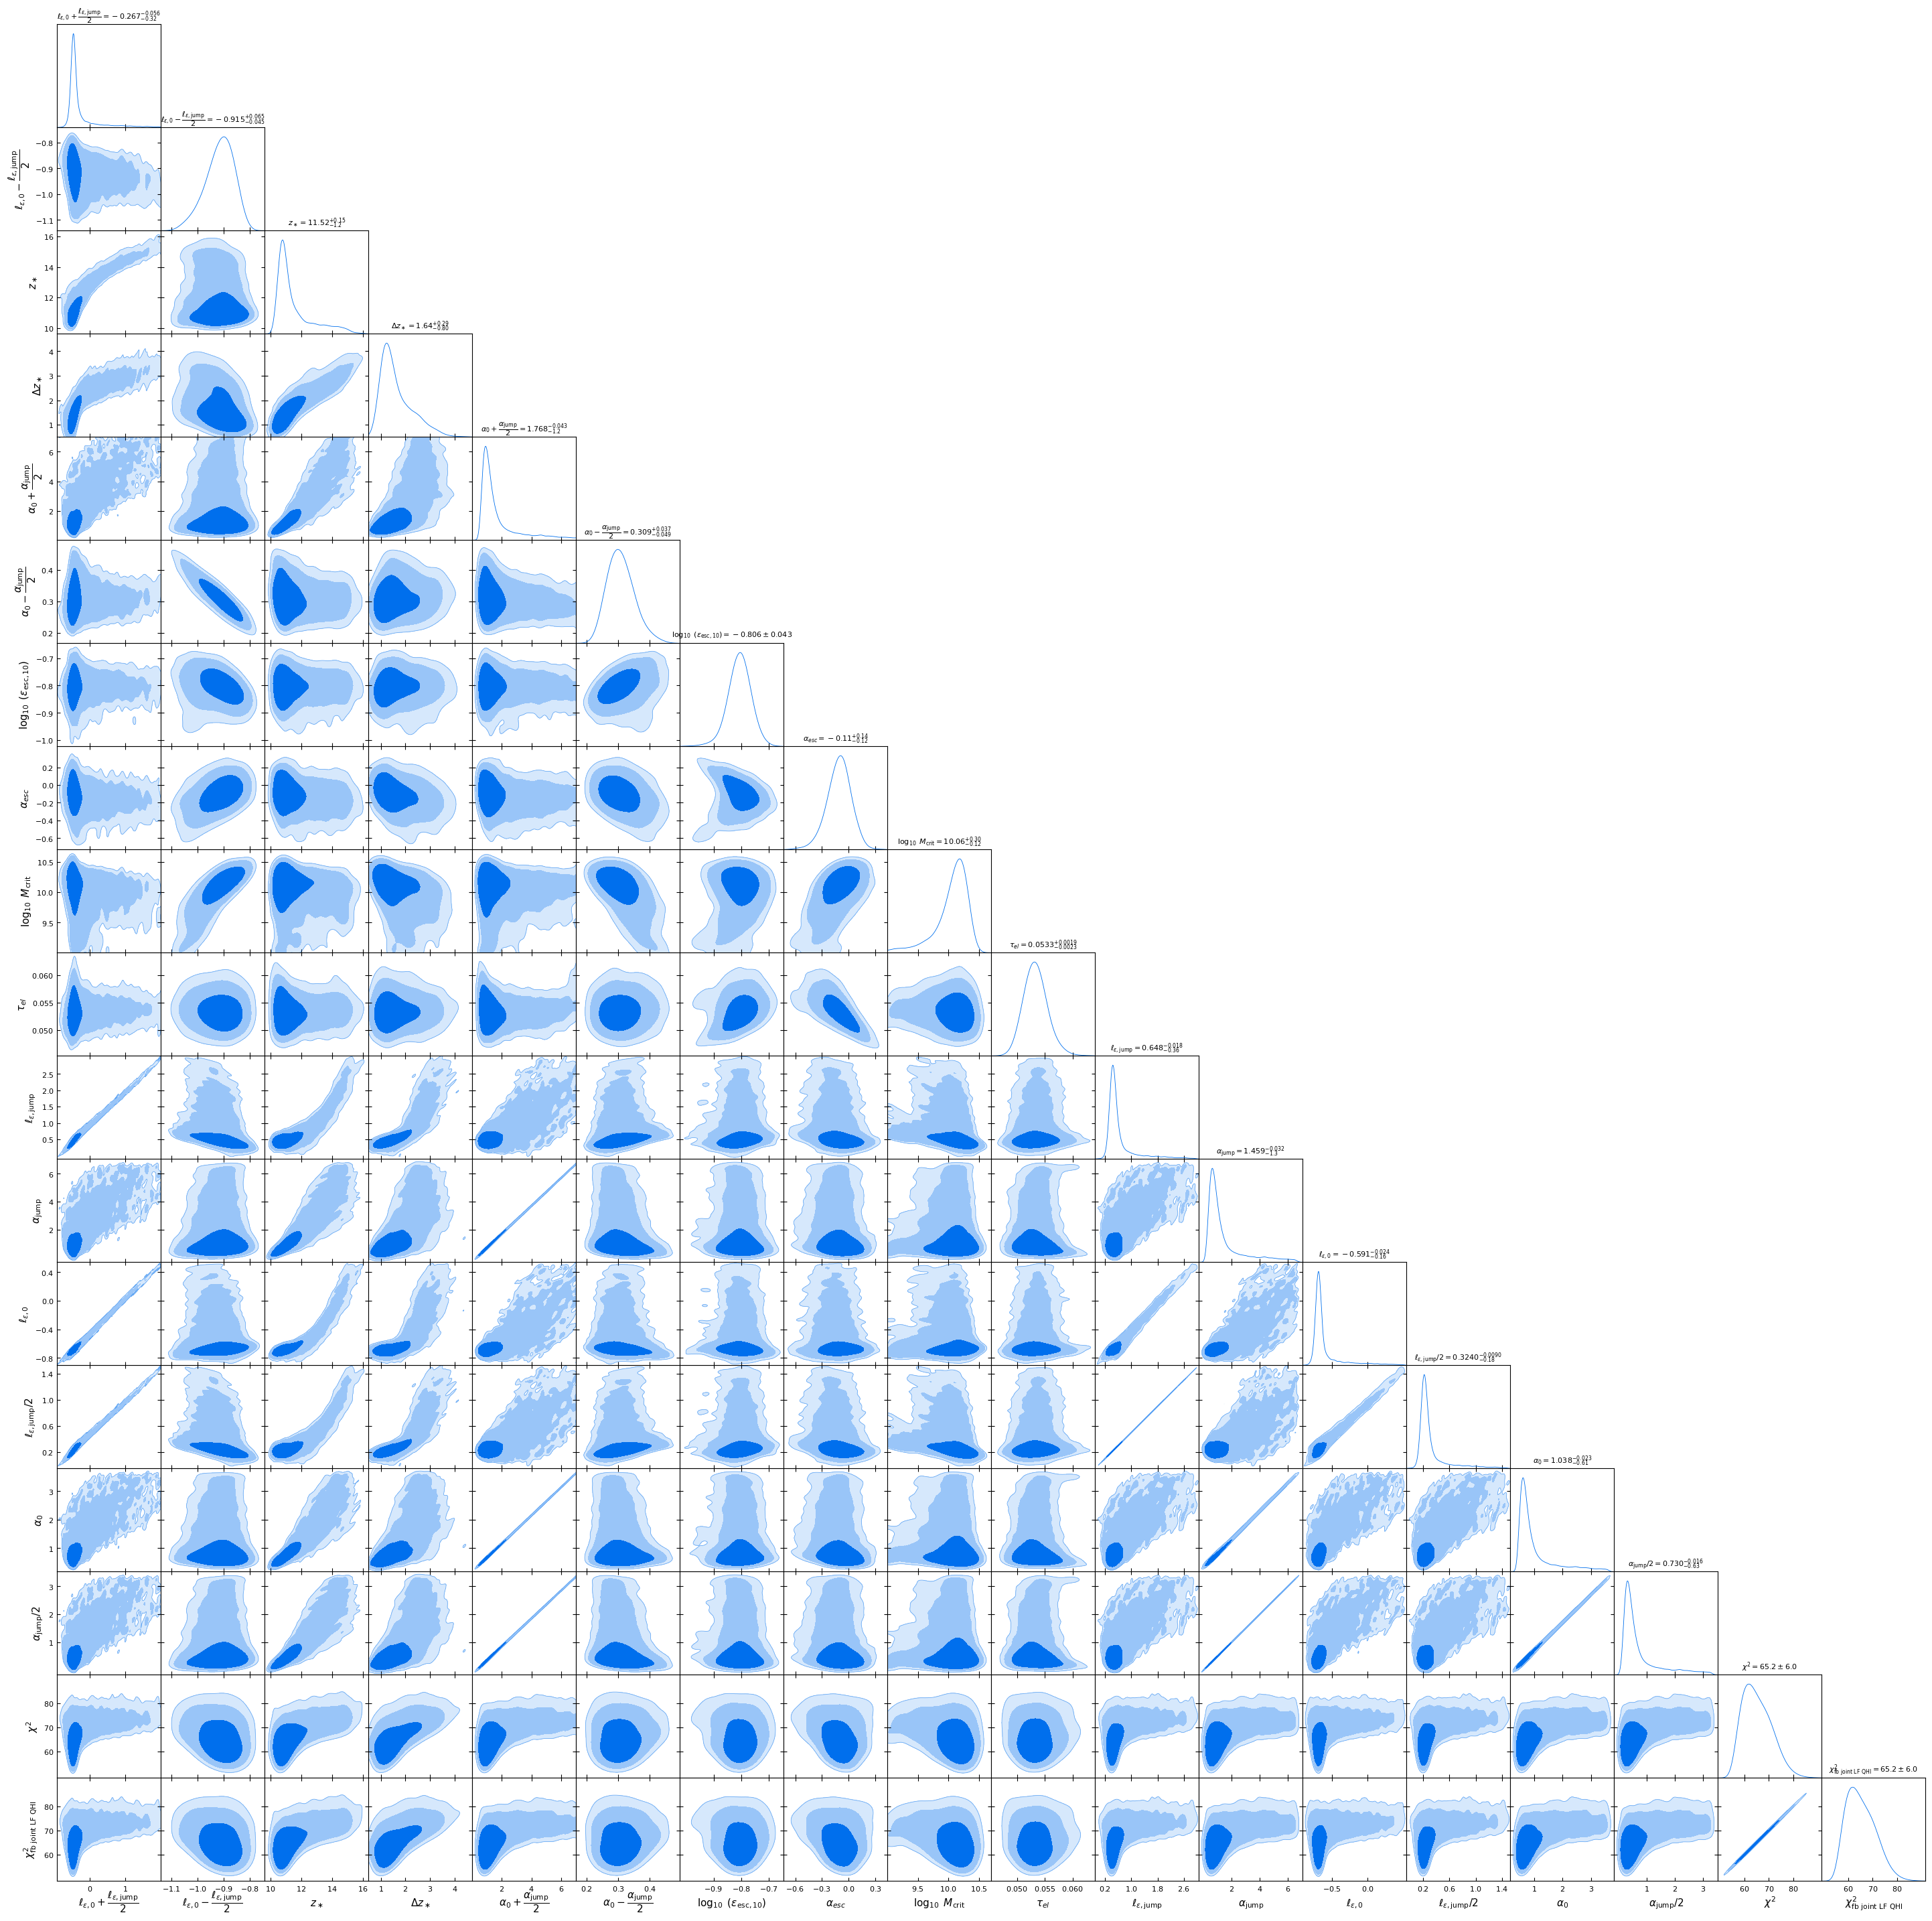

In [9]:
%matplotlib inline
make_plots = True
samples = loadMCSamples(chainsdir + '/' + fileroot, settings={'ignore_rows':burn_in,})

#samples.deleteFixedParams()

#print (np.shape(samples.weights), np.shape(samples.samples))
# mask = np.logical_and(samples.samples[:,5] >= -2.0, samples.samples[:,6] >= -2.0)
# samples.samples = samples.samples[mask,:]
# samples.weights = samples.weights[mask]
# samples.ranges.lower['log_norm_clump_0'] = -2.0
# samples.ranges.lower['log_f_s'] = -2.0
# print (samples.ranges.lower[samples.ranges.names == 'log_norm_clump_0'])
#print (samples.ranges.lower['log_norm_clump_0'], samples.ranges.names)
#print (samples.ranges)
#print (np.shape(samples.weights), np.shape(samples.samples))
#print (samples.chains)
margestats = samples.getMargeStats()
likestats = samples.getLikeStats()

print (likestats)

print (margestats)

print (samples.getNumSampleSummaryText())

#print (samples.getConvergeTests(what=('CorrLengths')))
#print (samples.getConvergeTests(what=('SplitTest')))
print (samples.getConvergeTests(what=('GelmanRubin')))

#print(samples.PCA(['log_zeta_0', 'alpha', 'log_fesc_0', 'norm_clump_0', 'f_s', 'log_normfac_a', 'normfac_b']))
#print(samples.PCA(['log_zeta_0', 'alpha']))

if (make_plots):
    g = plots.getSubplotPlotter()
    g.settings.num_plot_contours = 3
    g.triangle_plot(samples, filled=True, title_limit=1)#, params=['log_zeta_0', 'alpha', 'T_reion', 'tau_e'])

['\\ell_{\\varepsilon,0} + \\dfrac{\\ell_{\\varepsilon,\\mathrm{jump}}}{2}'
 '\\ell_{\\varepsilon,0} - \\dfrac{\\ell_{\\varepsilon,\\mathrm{jump}}}{2}'
 'z_\\ast' '\\Delta z_\\ast'
 '\\alpha_0 + \\dfrac{\\alpha_\\mathrm{jump}}{2}'
 '\\alpha_0 - \\dfrac{\\alpha_\\mathrm{jump}}{2}'
 '\\log_{10}~(\\varepsilon_{\\mathrm{esc,10}})' '\\alpha_{esc}'
 '\\log_{10}~M_{\\mathrm{crit}}' '\\tau_{el}'
 '\\ell_{\\varepsilon,\\mathrm{jump}}' '\\alpha_\\mathrm{jump}'
 '\\ell_{\\varepsilon,0}' '\\ell_{\\varepsilon,\\mathrm{jump}} / 2'
 '\\alpha_0' '\\alpha_\\mathrm{jump} / 2' '\\chi^2'
 '\\chi^2_\\mathrm{fb\\ joint\\ LF\\ QHI}']
min chisq =  52.714489


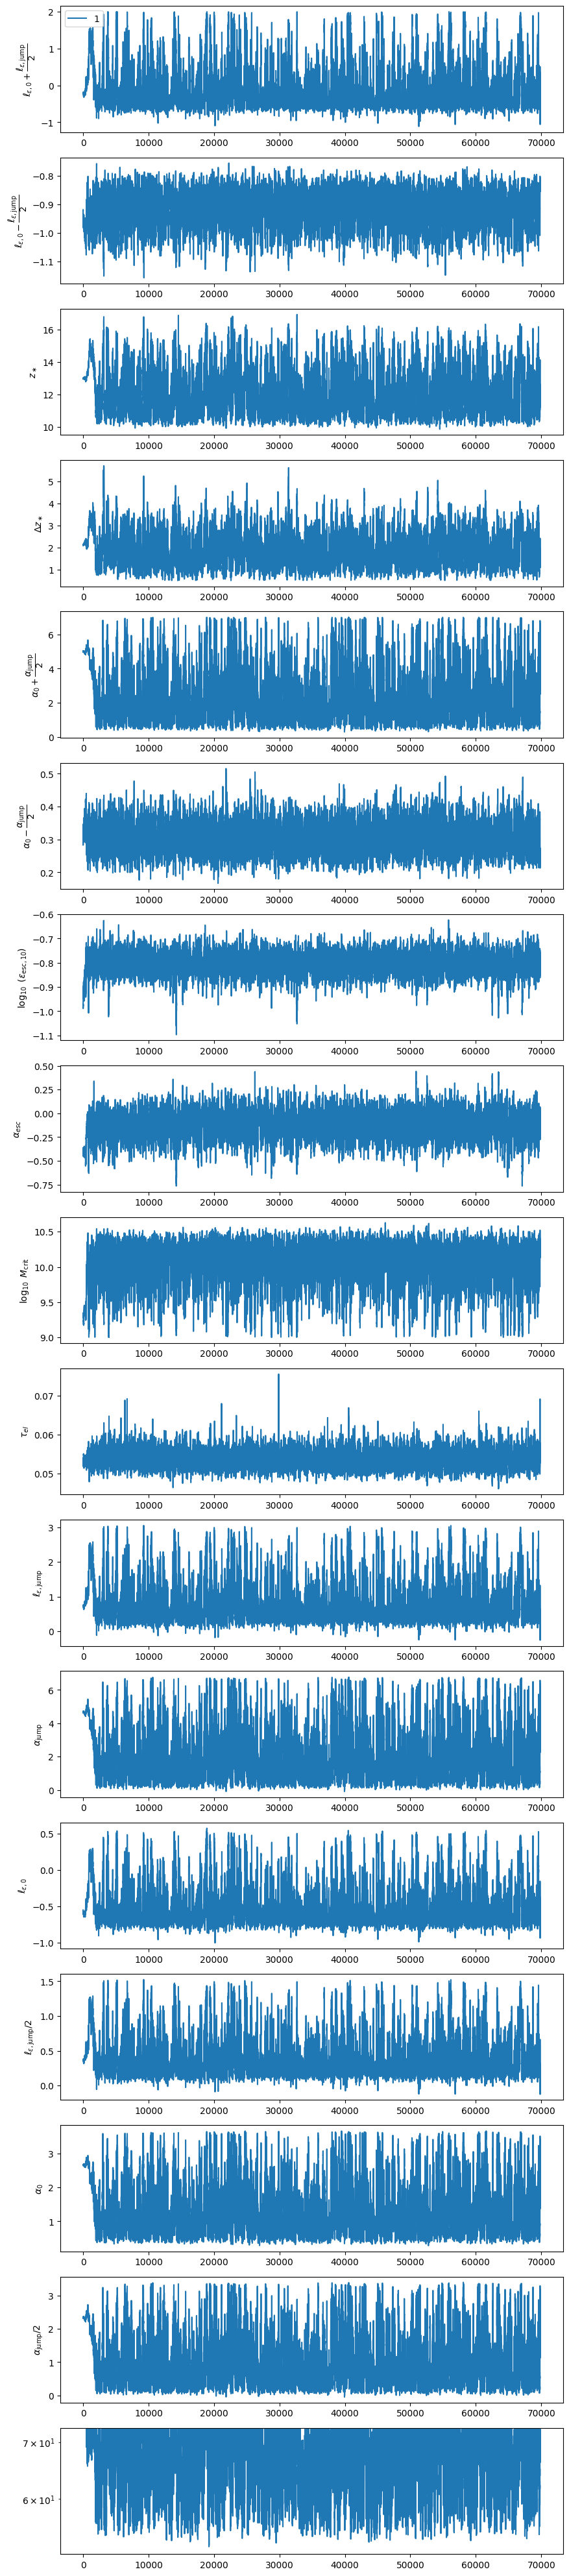

min chisq =  52.714489
[-0.45561218 -0.89934875 10.626592    1.0879096   0.81739246  0.30731827
 -0.80239105 -0.05343671 10.179883    0.05312382  0.44373656  0.51007419
 -0.67748047  0.22186828  0.56235536  0.2550371 ]
-0.45561218, -0.89934875, 10.626592  ,  1.0879096 ,  0.81739246,
  0.30731827, -0.80239105, -0.05343671, 10.179883  


NameError: name 'scale_chisq_UVLF' is not defined

In [10]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

i = 0
remove_param = 0
while (True):
    i += 1
    filename = chainsdir + '/' + fileroot + '.' + '{:d}'.format(i) + '.txt'
    #print (filename)
    if (os.path.exists(filename)):
        all_arr = np.loadtxt(filename)
        fixed_param = np.all(all_arr[1:, :-4] == all_arr[:-1, :-4], axis=0)
        #print (i, fixed_param[fixed_param == True], np.argmax(fixed_param))
        if (np.argmax(fixed_param) > 0): remove_param = np.argmax(fixed_param)
        
        
    else:
        break
    
if (remove_param > 0): print ('remove param = ', remove_param)

i = 0
chisq_min = 1.e32
chisq_max = -1.e32
while (True):
    i += 1
    filename = chainsdir + '/' + fileroot + '.' + '{:d}'.format(i) + '.txt'
    #print (filename)
    if (os.path.exists(filename)):
        all_arr = np.loadtxt(filename)
        if (remove_param > 0): all_arr = np.delete(all_arr, remove_param, axis=1)
        rows = np.shape(all_arr)[-1] - 5
        nsamp = np.shape(all_arr)[0]
        #print (i, rows, nsamp)


        if (i == 1):
            fig = plt.figure(figsize=(10, rows * 3))
            axs = fig.subplots(rows, 1)

        for j in range(rows-1):
            #print (i)
            axs[j].plot(np.linspace(1, nsamp, nsamp), all_arr[:, j+2], label='{:d}'.format(i))
            if (i == 1): axs[j].set_ylabel(r'$' + samples.getParamNames().labels()[j] + '$')
            # print (j, axs[j].get_ylim())
            # if (abs(axs[j].get_ylim()[1] / axs[j].get_ylim()[0]) > 1.e2):
            if (i > 13 and np.max(all_arr[:, j+2]) / np.min(all_arr[:, j+2]) > 1.e2):
                 axs[j].set_yscale('symlog')
        axs[rows-1].plot(np.linspace(1, nsamp, nsamp), all_arr[:, -1])
        #mask = all_arr[:, -1] < 1.e33
        #mask = np.logical_and(all_arr[:,rows] < 5.7, all_arr[:,rows] > 5.2)
        #mask = np.logical_and(mask, all_arr[:,rows-1] > 0.05)
        #mask = all_arr[:,rows-1] > 0.052
        #mask = np.logical_and(mask, all_arr[:,rows] < 5.7)
        
        #chisq_min = min(chisq_min, np.min(all_arr[mask, -1]))
        #chisq_max = max(chisq_max, np.max(all_arr[mask, -1]))
        
        if (i == 1): 
            all_all_arr = all_arr[:,:]
        else:
            all_all_arr = np.append(all_all_arr, all_arr[:,:], axis=0)
    else:
        break

# for j in range(13,rows-1):        
#     print (j, axs[j].get_ylim(), abs(axs[j].get_ylim()[1] / axs[j].get_ylim()[0]))
#     # if (abs(axs[j].get_ylim()[1] / axs[j].get_ylim()[0]) > 5e1):
#     if (np.max() / axs[j].get_ylim()[0]) > 5e1):
#         axs[j].set_yscale('log')

only_param_arr = all_all_arr[:,2:-4]
only_param_arr = np.hstack((only_param_arr, all_all_arr[:,-2:]))
param_names = np.char.array(samples.getParamNames().labels())
print (param_names)



chisq_min = min(all_all_arr[:,-1])
chisq_max = max(all_all_arr[:,-1])
print ('min chisq = ', chisq_min)
arg_chisq_min = np.argmin(all_all_arr[:, -1])


axs[0].legend()
#axs[rows-1].set_ylim(0.98 * chisq_min, 1.2 * chisq_max)
axs[rows-1].set_ylim(0.98 * chisq_min, max(1.05 * chisq_min, chisq_min + 20.0))
axs[rows-1].set_yscale('log')
#fig.tight_layout()
plt.show()
print ('min chisq = ', chisq_min)
print (all_all_arr[:, 2:rows+1][arg_chisq_min])

##################################################################

##################################################################

# Convert the array to a string with commas as separators
arr_str = np.array2string(all_all_arr[:, 2:rows+1-7][arg_chisq_min], separator=', ')

# Remove the square brackets from the string
arr_str = arr_str[1:-1]

# Print the formatted string
print(arr_str)

##################################################################

mask_param = param_names == '\\tau_e'
mask = np.abs(only_param_arr[:, mask_param] - 0.054) < 0.002 #* 1e6
# mask = only_param_arr[:,mask_param] > 0.07

# mask_param = param_names == 'z_\\mathrm{end}'
# mask = np.logical_and(mask, only_param_arr[:,mask_param] < 5.7)
# mask = np.logical_and(mask, only_param_arr[:,mask_param] > 5.2)

# mask_param = param_names == '\\beta_\\mathrm{MHR}'
# mask = np.logical_and(mask, only_param_arr[:,mask_param] > 2.0)

mask_param = param_names == '\\chi^2_\\mathrm{UVLF}'
#mask = np.logical_and(mask, only_param_arr[:,mask_param] < 68.0)
mask = np.logical_and(mask, only_param_arr[:,mask_param] < scale_chisq_UVLF * 90.0)

mask_param = param_names == '\\chi^2_\\mathrm{mfp}'
mask = np.logical_and(mask, only_param_arr[:,mask_param] < 2.0)

mask_param = param_names == '\\chi^2_{\\Gamma_\\mathrm{HI}}'
mask = np.logical_and(mask, only_param_arr[:,mask_param] < 2.05)

mask_param = param_names == '\\chi^2_{T_0}'
mask = np.logical_and(mask, only_param_arr[:,mask_param] < 3.0)

mask_param = param_names == '\\chi^2_\\gamma'
mask = np.logical_and(mask, only_param_arr[:,mask_param] < 3.0)

mask_param = param_names == '\\chi^2_{z_\\mathrm{end}}'
mask = np.logical_and(mask, only_param_arr[:,mask_param] < 1.0)

# mask_param = param_names == '\\alpha_C'
# mask = np.logical_and(mask, np.abs(only_param_arr[:,mask_param] - 1.02) < 0.01)
# mask_param = param_names == '\\log T_{\\mathrm{re}}'
# mask = np.logical_and(mask, np.abs(only_param_arr[:,mask_param] - 4.35) < 0.01)

all_all_arr = all_all_arr[mask[:,0],:]

only_param_arr = all_all_arr[:,2:-4]
only_param_arr = np.hstack((only_param_arr, all_all_arr[:,-2:]))

print ('min chisq = ', min(only_param_arr[:, param_names == '\\chi^2']))
arg_chisq_min = np.argmin(only_param_arr[:, param_names == '\\chi^2'])
print (only_param_arr[:, :][arg_chisq_min])

print ('min chisq_mfp = ', min(only_param_arr[:, param_names == '\\chi^2_\\mathrm{mfp}']))
arg_chisq_mfp_min = np.argmin(only_param_arr[:, param_names == '\\chi^2_\\mathrm{mfp}'])
print (only_param_arr[:, :][arg_chisq_mfp_min])

print ('min (chisq_mfp + chisq_Gamma_HI) = ', min(only_param_arr[:, param_names == '\\chi^2_\\mathrm{mfp}'] + only_param_arr[:, param_names == '\\chi^2_{\\Gamma_\\mathrm{HI}}']))
arg_chisq_mfp_Gamma_HI_min = np.argmin(only_param_arr[:, param_names == '\\chi^2_\\mathrm{mfp}'] + only_param_arr[:, param_names == '\\chi^2_{\\Gamma_\\mathrm{HI}}'])
print (only_param_arr[:, :][arg_chisq_mfp_Gamma_HI_min])

In [ ]:
# ### Select random samples from the chains
# seed = 66
# nrand = 20
# rng = np.random.default_rng(seed)
# nsamp = samples.samples.shape[0]
# random_samp_arr = rng.integers(low=0, high=nsamp, size=nrand)

In [ ]:
# ### Plot the observables for the random samples

# ##%%time
# from __future__ import print_function

# import numpy as np
# import pylab as plt
# import os, glob
# import configparser
# import matplotlib

# import script


# data_path = './MUSIC_outputs/N64_L64.0'
# ngrid = 4


# zend_min = 5.3
# tau_e_filename = './data_files/tau_e.txt'
# dark_pixels_filename = './data_files/Dark_pixels.txt'
# T0_gamma_filename = './data_files/T0_gamma.txt'


# zUVLF_arr = np.array([7.0, 6.0])
# UVLF_filename_list = []
# for i, zUVLF in enumerate(zUVLF_arr):
#     zchar = '{:.1f}'.format(zUVLF)
#     zchar = zchar.replace('.', 'p')
#     UVLF_filename = './data_files/UV_lumfun_z' + zchar + '.txt'
#     UVLF_filename_list.append(UVLF_filename)
    

# thermal_likelihood = script.thermal_ion_evolution(data_path, ngrid, 
#                                                   zend_min=zend_min, 
#                                                   tau_e_filename=tau_e_filename, 
#                                                   dark_pixels_filename=dark_pixels_filename, 
#                                                   T0_gamma_filename=T0_gamma_filename,
#                                                   zUVLF_arr=zUVLF_arr, UVLF_filename_list=UVLF_filename_list##, verbose=True)
# )

# thermal_likelihood.data_root = 'snap'
# thermal_likelihood.outpath = data_path + '/script_files'  ## directory where the script-related files would be stored

# thermal_likelihood.clumping = 3.0
# thermal_likelihood.z_0 = 5.5
# thermal_likelihood.M_0 = 8.e10

# thermal_likelihood.feedback = 'step'

# thermal_likelihood.compute_temp_element = True
# thermal_likelihood.element_nsamp = 3
# thermal_likelihood.element_seed = 12345
# thermal_likelihood.element_sigma = 1.0

# # thermal_likelihood.M_UV_edges_list = []
# # thermal_likelihood.M_UV_edges_list.append(np.linspace(-8.0, -22.0, 141))
# # thermal_likelihood.M_UV_edges_list.append(np.linspace(-8.0, -22.0, 141))

# #thermal_likelihood.M_UV_min = -21.0

# ##########################################
# #########################################

# fig = plt.figure(figsize=(14, 4))
# axs = fig.subplots(1, 3)

# # print (class_object_list[0].chisq, class_object_list[1].chisq)



    


# #########################################
# ##################################

# tau_min = 0.04
# tau_max = 0.07
# cmap = matplotlib.cm.jet

# for i in range(nrand):
#     thermal_likelihood.zeta_0 = 10 ** samples.samples[random_samp_arr[i], 0]
#     thermal_likelihood.alpha = samples.samples[random_samp_arr[i], 1]
#     thermal_likelihood.T_reion = 10 ** samples.samples[random_samp_arr[i], 2]
#     thermal_likelihood.fesc_0 = 10 ** samples.samples[random_samp_arr[i], 5]
#     thermal_likelihood.beta = samples.samples[random_samp_arr[i], 4]

#     thermal_likelihood.thermal_evolution()
#     thermal_likelihood.all_chisq()
    
#     color_indx = (thermal_likelihood.tau_arr[0] - tau_min) / (tau_max - tau_min)
#     color = cmap(color_indx)
    
#     axs[0].plot(thermal_likelihood.z_arr, thermal_likelihood.QHII_mean_arr, c=color, alpha=0.1)
#     axs[1].plot(thermal_likelihood.z_arr, thermal_likelihood.T0_arr, c=color, alpha=0.1)
#     axs[2].plot(thermal_likelihood.z_arr, thermal_likelihood.gamma_arr, c=color, alpha=0.1)
#     # print (random_samp_arr[i], 
#     #        #thermal_likelihood.zeta_0, thermal_likelihood.alpha, thermal_likelihood.T_reion, thermal_likelihood.fesc_0, thermal_likelihood.beta,
#     #        samples.samples[random_samp_arr[i], -1], samples.samples[random_samp_arr[i], 5], 
#     #        thermal_likelihood.chisq, thermal_likelihood.tau_arr[0])
    
# axs[0].axvline(thermal_likelihood.zend_min, c='r', ls=':')
# axs[0].errorbar(thermal_likelihood.z_DP_arr, 1 - thermal_likelihood.xHI_UL_arr, yerr=thermal_likelihood.sigma_xHI_arr, lolims=True, fmt='o', c='r')
# #axs[0].legend()
# axs[0].set_ylabel(r'$Q_{\mathrm{HII}}$')

# axs[1].errorbar(thermal_likelihood.z_T0_arr, thermal_likelihood.T0_obs_arr, yerr=thermal_likelihood.sigma_T0_obs_arr, fmt='o', c='r')
# axs[1].set_ylabel(r'$T_0$')

# axs[2].errorbar(thermal_likelihood.z_T0_arr, thermal_likelihood.gamma_obs_arr, yerr=thermal_likelihood.sigma_gamma_obs_arr, fmt='o', c='r')
# axs[2].set_ylabel(r'$\gamma$')

# #plt.yscale('log')

# for i in range(3):
#     axs[i].set_xlim(5.0, 14.0)
#     axs[i].set_xlabel(r'$z$')


# from mpl_toolkits.axes_grid1 import make_axes_locatable
# norm = matplotlib.colors.Normalize(vmin=tau_min, vmax=tau_max)

# for i in range(3):
#     the_divider = make_axes_locatable(axs[i])
#     color_axis = the_divider.append_axes("right", size="5%", pad=0.1)

#     # Colorbar.
#     if (i == 2):
#         cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), cax=color_axis)
#         cbar.set_label(r'$\tau_e$', fontsize=21, labelpad=-2)
#     else:
#         color_axis.axis('off')

# fig.tight_layout()
# plt.show()